In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
np.random.seed(314)
from FFNN import FFNN
from functions import * 

from sklearn.preprocessing import StandardScaler


x = np.linspace(-1,1,20).reshape(-1,1)  # 20 rows, 1 column
y = runge_function(x) 
y_min = np.min(y) 
y_max = np.max(y)
y_scaled = (y - y_min) / (y_max - y_min)

degree = 10
X_poly = np.vander(x.flatten(), degree)
X_poly = StandardScaler().fit_transform(X_poly)




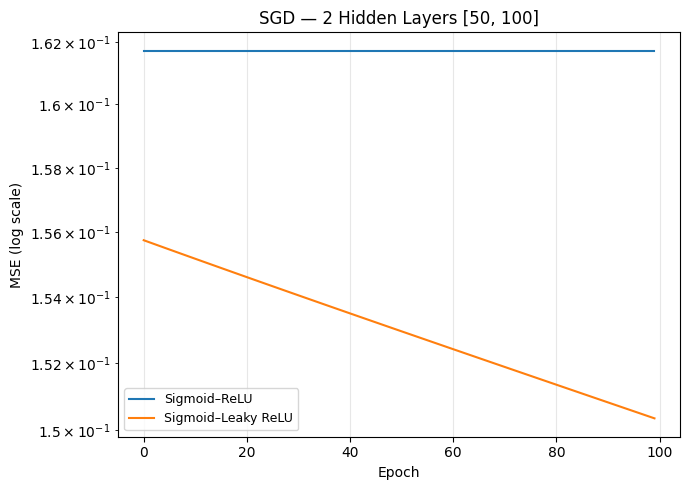

In [18]:
import matplotlib.pyplot as plt
np.random.seed(314)

epochs = 100
learning_rate = 0.01

#needed to scale the random weights intilizations
def scaled_init_FFNN(input_size, layer_output_sizes, scale=0.1):
    ffnn = FFNN(input_size, layer_output_sizes)
    ffnn.layers = [
        (np.random.randn(*W.shape) * scale, np.zeros_like(b))
        for W, b in ffnn.layers
    ]
    return ffnn

activations_list = [
    ("Sigmoid–ReLU", 
     [sigmoid, sigmoid, ReLU], 
     [sigmoid_derivative, sigmoid_derivative, ReLU_derivative]),
    
    ("Sigmoid–Leaky ReLU", 
     [sigmoid, sigmoid, leaky_ReLU], 
     [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_derivative])
]

results = {}

for name, acts, dacts in activations_list:
    model = scaled_init_FFNN(1, [50, 100, 1])
    losses = []

    for epoch in range(epochs):
        for i in range(len(x)):
            _ = model.forward_pass(x[i:i+1], acts)
            model.backward_pass(y_scaled[i:i+1], dacts, learning_rate)

        out = model.forward_pass(x, acts)
        loss = np.mean((out - y_scaled)**2)
        losses.append(loss)

    results[name] = losses

fig, ax = plt.subplots(figsize=(7,5))
for name, losses in results.items():
    ax.plot(losses, label=name)
ax.set_title("SGD — 2 Hidden Layers [50, 100]")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE (log scale)")
ax.set_yscale("log")
ax.grid(alpha=0.3)
ax.legend(fontsize=9)
plt.tight_layout()
plt.savefig("Figures/activation_sgd_2layers_50_100.pdf", dpi=300) 
plt.show()
